# Lab | Pandas

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

The data includes information such as customer ID, state, gender, education, income, and other variables that can be used to perform various analyses.

Throughout the lab, we will be using the pandas library in Python to manipulate and analyze the data. Pandas is a powerful library that provides various data manipulation and analysis tools, including the ability to load and manipulate data from a variety of sources, including CSV files.

### Data Description

- Customer - Customer ID

- ST - State where customers live

- Gender - Gender of the customer

- Education - Background education of customers 

- Customer Lifetime Value - Customer lifetime value(CLV) is the total revenue the client will derive from their entire relationship with a customer. In other words, is the predicted or calculated value of a customer over their entire duration as a policyholder with the insurance company. It is an estimation of the net profit that the insurance company expects to generate from a customer throughout their relationship with the company. Customer Lifetime Value takes into account factors such as the duration of the customer's policy, premium payments, claim history, renewal likelihood, and potential additional services or products the customer may purchase. It helps insurers assess the long-term profitability and value associated with retaining a particular customer.

- Income - Customers income

- Monthly Premium Auto - Amount of money the customer pays on a monthly basis as a premium for their auto insurance coverage. It represents the recurring cost that the insured person must pay to maintain their insurance policy and receive coverage for potential damages, accidents, or other covered events related to their vehicle.

- Number of Open Complaints - Number of complaints the customer opened

- Policy Type - There are three type of policies in car insurance (Corporate Auto, Personal Auto, and Special Auto)

- Vehicle Class - Type of vehicle classes that customers have Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car

- Total Claim Amount - the sum of all claims made by the customer. It represents the total monetary value of all approved claims for incidents such as accidents, theft, vandalism, or other covered events.


External Resources: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

## Challenge 1: Understanding the data

In this challenge, you will use pandas to explore a given dataset. Your task is to gain a deep understanding of the data by analyzing its characteristics, dimensions, and statistical properties.

- Identify the dimensions of the dataset by determining the number of rows and columns it contains.
- Determine the data types of each column and evaluate whether they are appropriate for the nature of the variable. You should also provide suggestions for fixing any incorrect data types.
- Identify the number of unique values for each column and determine which columns appear to be categorical. You should also describe the unique values of each categorical column and the range of values for numerical columns, and give your insights.
- Compute summary statistics such as mean, median, mode, standard deviation, and quartiles to understand the central tendency and distribution of the data for numerical columns. You should also provide your conclusions based on these summary statistics.
- Compute summary statistics for categorical columns and providing your conclusions based on these statistics.

In [56]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# Loading data as a Dataframe

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"

df = pd.read_csv(url)

df

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Data shape

df.shape

(4008, 11)

In [59]:
# Data types

df.dtypes

Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

In [60]:
# Checking for nulls - as this is not within the scope of the lab, I will be doing it just for analysis purposes later

df.isna().sum()

Customer                     2937
ST                           2937
GENDER                       3054
Education                    2937
Customer Lifetime Value      2940
Income                       2937
Monthly Premium Auto         2937
Number of Open Complaints    2937
Policy Type                  2937
Vehicle Class                2937
Total Claim Amount           2937
dtype: int64

In [61]:
# Checking 'Number of Open Complaints unique values'

df['Number of Open Complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [62]:
# Fixing "Customer Lifetime Value" col

# Removing '%'
df['Customer Lifetime Value'] = df['Customer Lifetime Value'].str.replace('%', '')

# Converting to float
df['Customer Lifetime Value'] = df['Customer Lifetime Value'].astype(float)

# Dividing by 100 and rounding to 2 decimal numbers
df['Customer Lifetime Value'] = df['Customer Lifetime Value'].div(100).round(2)

df['Customer Lifetime Value']

0            NaN
1        6979.54
2       12887.43
3        7645.86
4        5363.08
          ...   
4003         NaN
4004         NaN
4005         NaN
4006         NaN
4007         NaN
Name: Customer Lifetime Value, Length: 4008, dtype: float64

In [63]:
# Identifying unique values

cols = df.columns

for col in cols:
    print(col, '-', df[col].nunique())

Customer - 1071
ST - 8
GENDER - 5
Education - 6
Customer Lifetime Value - 1027
Income - 774
Monthly Premium Auto - 132
Number of Open Complaints - 6
Policy Type - 3
Vehicle Class - 6
Total Claim Amount - 761


In [64]:
# Analysis of categorical columns

categorical = ['ST', 'GENDER', 'Education', 'Policy Type', 'Vehicle Class']

# Retrieving unique values for categorical cols
for col in categorical:
    print(col, ':', df[col].unique())

ST : ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 'Cali' 'AZ' 'WA'
 nan]
GENDER : [nan 'F' 'M' 'Femal' 'Male' 'female']
Education : ['Master' 'Bachelor' 'High School or Below' 'College' 'Bachelors' 'Doctor'
 nan]
Policy Type : ['Personal Auto' 'Corporate Auto' 'Special Auto' nan]
Vehicle Class : ['Four-Door Car' 'Two-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car' nan]


In [65]:
# Analysis of numerical columns, 'Number of Open Policies' is not taken into account due to reasons mentioned above

numerical = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Total Claim Amount']

# Range values of numerical cols
for col in numerical:
    print(col, ':', df[col].max() - df[col].min())
    
# It is difficult to draw insights solely from range values. Will be done after the next block of cells

Customer Lifetime Value : 56162.200000000004
Income : 99960.0
Monthly Premium Auto : 35293.0
Total Claim Amount : 2892.857571


In [66]:
# Summary statistics of numerical cols

df[numerical].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
count,1068.000000,1071.000000,1071.000000,1071.000000
mean,7936.902528,39295.701214,193.234360,404.986909
std,6434.784168,30469.427060,1601.190369,293.027260
min,2004.350000,0.000000,61.000000,0.382107
25%,4034.077500,14072.000000,68.000000,202.157702
50%,5881.745000,36234.000000,83.000000,354.729129
75%,8962.872500,64631.000000,109.500000,532.800000
max,58166.550000,99960.000000,35354.000000,2893.239678


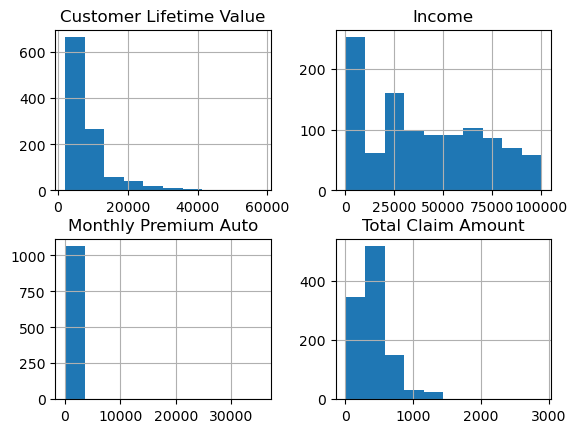

In [67]:
# Distribution of numerical cols

df[numerical].hist()

plt.show()

## Challenge 2: analyzing the data

### Exercise 1

The marketing team wants to know the top 5 less common customer locations. Create a pandas Series object that contains the customer locations and their frequencies, and then retrieve the top 5 less common locations in ascending order.

In [68]:
# Counting values from 'ST' column
state_freq = df['ST'].value_counts()

# Sorting in ascending order and keeping first 5
less_common = state_freq.sort_values(ascending=True).head(5)

less_common

ST
AZ             25
WA             30
Washington     81
Nevada         98
Cali          120
Name: count, dtype: int64

### Exercise 2

The sales team wants to know the total number of policies sold for each type of policy. Create a pandas Series object that contains the policy types and their total number of policies sold, and then retrieve the policy type with the highest number of policies sold.

*Hint:*
- *Using value_counts() method simplifies this analysis.*
- *Futhermore, there is a method that returns the index of the maximum value in a column or row.*


In [69]:
# Counting values from 'Policy Type' column
policy_counts = df['Policy Type'].value_counts()

# Sorting in descending order and keeping first
max_n_policies = policy_counts.head(1)

max_n_policies

Policy Type
Personal Auto    780
Name: count, dtype: int64

### Exercise 3

The sales team wants to know if customers with Personal Auto have a lower income than those with Corporate Auto. How does the average income compare between the two policy types?

- Use *loc* to create two dataframes: one containing only Personal Auto policies and one containing only Corporate Auto policies.
- Calculate the average income for each policy.
- Print the results.

In [70]:
# Creating Personal Auto policies df

personal = df.loc[df['Policy Type'] == 'Personal Auto']

personal

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.30,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
1065,XD85577,Cali,M,Bachelor,2842.27,69417.0,73.0,1/1/00,Personal Auto,Four-Door Car,30.874869
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1/1/00,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,Cali,F,High School or Below,20315.00,63209.0,102.0,1/2/00,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000


In [71]:
# Creating Corporate Auto policies df

corporate = df.loc[df['Policy Type'] == 'Corporate Auto']

corporate

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
6,XZ87318,Oregon,F,College,5380.90,55350.0,67.0,1/0/00,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,Master,7216.10,0.0,101.0,1/0/00,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,Bachelor,24127.50,14072.0,71.0,1/0/00,Corporate Auto,Four-Door Car,511.200000
12,DP39365,California,NaN,Master,8798.80,77026.0,110.0,1/2/00,Corporate Auto,Four-Door Car,472.029737
...,...,...,...,...,...,...,...,...,...,...,...
1045,WZ31900,Oregon,F,Bachelor,8649.70,94389.0,107.0,1/0/00,Corporate Auto,SUV,85.063708
1050,BJ53923,Arizona,M,High School or Below,2600.27,51978.0,66.0,1/0/00,Corporate Auto,Four-Door Car,144.782152
1052,FB23788,Oregon,M,High School or Below,8828.83,86721.0,111.0,1/0/00,Corporate Auto,SUV,532.800000
1056,PI47776,Oregon,F,Bachelor,2530.71,89451.0,63.0,1/0/00,Corporate Auto,Four-Door Car,61.769564


In [72]:
# Calculating and comparing mean income of both

print('Mean of Personal Auto policies df:', personal['Income'].mean())

print('Mean of Corporate Auto policies df:', corporate['Income'].mean())

Mean of Personal Auto policies df: 38180.69871794872
Mean of Corporate Auto policies df: 41390.31196581197


In [73]:
# Calculating difference

diff = (corporate['Income'].mean() - personal['Income'].mean()) / personal['Income'].mean()

diff

0.08406376403882868

### Bonus: Exercise 4


Your goal is to identify customers with a high policy claim amount.

Instructions:

- Review again the statistics for total claim amount to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount data. 

*Note: When analyzing data, we often want to focus on certain groups of values to gain insights. Percentiles are a useful tool to help us define these groups. A percentile is a measure that tells us what percentage of values in a dataset are below a certain value. For example, the 75th percentile represents the value below which 75% of the data falls. Similarly, the 25th percentile represents the value below which 25% of the data falls. When we talk about the top 25%, we are referring to the values that fall above the 75th percentile, which represent the top quarter of the data. On the other hand, when we talk about the bottom 25%, we are referring to the values that fall below the 25th percentile, which represent the bottom quarter of the data. By focusing on these groups, we can identify patterns and trends that may be useful for making decisions and taking action.*

*Hint: look for a method that gives you the percentile or quantile 0.75 and 0.25 for a Pandas Series.*

*Hint 2: check `Boolean selection according to the values of a single column` in https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9*

In [75]:
# Creating df with 75+ percentile of Total Claim Amount

claim75 = df[df['Total Claim Amount'] > df['Total Claim Amount'].quantile(q=0.75)]

claim75

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
17,OE15005,Cali,NaN,College,3945.24,28855.0,101.0,1/0/00,Personal Auto,SUV,647.442031
23,TZ98966,Nevada,NaN,Bachelor,2450.19,0.0,73.0,1/3/00,Corporate Auto,Four-Door Car,554.376763
26,US89481,California,NaN,Bachelor,3946.37,0.0,111.0,1/0/00,Personal Auto,Four-Door Car,799.200000
...,...,...,...,...,...,...,...,...,...,...,...
1059,YG44474,Oregon,M,College,14014.72,54193.0,117.0,1/0/00,Corporate Auto,SUV,720.752945
1061,RY92647,Cali,F,Bachelor,10506.77,0.0,92.0,1/0/00,Personal Auto,Four-Door Car,546.524896
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,1/0/00,Special Auto,SUV,547.200000


In [78]:
# Checking that every value in the new df is above 75th quantile

claim75['Total Claim Amount'].min() > df['Total Claim Amount'].quantile(q=0.75)

True

In [79]:
# Retrieving summary statistics of the new df

claim75.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
count,264.000000,264.000000,264.000000,264.000000
mean,9086.867917,23677.344697,165.193182,782.228263
std,6387.678450,27013.483721,623.930992,292.751640
min,2287.600000,0.000000,63.000000,537.600000
25%,4723.957500,0.000000,99.000000,606.521741
50%,7781.765000,18807.000000,114.000000,679.597985
75%,10544.297500,42423.750000,133.250000,851.400000
max,38445.860000,99316.000000,10202.000000,2893.239678
